In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [37]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79f1c99fbd2f3944bbf4f5b231108a42


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | avarua
Processing Record 2 of Set 13 | ciras
City not found. Skipping...
Processing Record 3 of Set 13 | atuona
Processing Record 4 of Set 13 | busselton
Processing Record 5 of Set 13 | nerang
Processing Record 6 of Set 13 | pacific grove
Processing Record 7 of Set 13 | hilo
Processing Record 8 of Set 13 | rawson
Processing Record 9 of Set 13 | carnarvon
Processing Record 10 of Set 13 | namibe
Processing Record 11 of Set 13 | mataura
Processing Record 12 of Set 13 | airai
Processing Record 13 of Set 13 | ushuaia
Processing Record 14 of Set 13 | vaini
Processing Record 15 of Set 13 | rikitea
Processing Record 16 of Set 13 | choya
Processing Record 17 of Set 13 | kapaa
Processing Record 18 of Set 13 | mana
Processing Record 19 of Set 13 | esmeraldas
Processing Record 20 of Set 13 | luderitz
Processing Record 21 of Set 13 | ketchikan
Processing Record 22 of Set 13 | illoqqortoormiut
City not found.

Processing Record 33 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 34 of Set 16 | saint-philippe
Processing Record 35 of Set 16 | dubenskiy
City not found. Skipping...
Processing Record 36 of Set 16 | alofi
Processing Record 37 of Set 16 | jiujiang
Processing Record 38 of Set 16 | butaritari
Processing Record 39 of Set 16 | buchanan
Processing Record 40 of Set 16 | carballo
Processing Record 41 of Set 16 | port hardy
Processing Record 42 of Set 16 | lincoln
Processing Record 43 of Set 16 | lingao
Processing Record 44 of Set 16 | de-kastri
Processing Record 45 of Set 16 | yulara
Processing Record 46 of Set 16 | aklavik
Processing Record 47 of Set 16 | fez
Processing Record 48 of Set 16 | papetoai
Processing Record 49 of Set 16 | el limon
Processing Record 50 of Set 16 | alappuzha
Processing Record 1 of Set 17 | palembang
Processing Record 2 of Set 17 | tondano
Processing Record 3 of Set 17 | bowen
Processing Record 4 of Set 17 | marsh harbour
Processing Record 5 

Processing Record 18 of Set 20 | lagoa
Processing Record 19 of Set 20 | walvis bay
Processing Record 20 of Set 20 | laguna
Processing Record 21 of Set 20 | camana
Processing Record 22 of Set 20 | margate
Processing Record 23 of Set 20 | djibo
Processing Record 24 of Set 20 | teguldet
Processing Record 25 of Set 20 | ust-ishim
Processing Record 26 of Set 20 | moroni
Processing Record 27 of Set 20 | carbonia
Processing Record 28 of Set 20 | alotau
City not found. Skipping...
Processing Record 29 of Set 20 | birmingham
Processing Record 30 of Set 20 | visnagar
Processing Record 31 of Set 20 | vostochnyy
Processing Record 32 of Set 20 | bulaevo
Processing Record 33 of Set 20 | sao joao da barra
Processing Record 34 of Set 20 | chaman
Processing Record 35 of Set 20 | serravalle
Processing Record 36 of Set 20 | camabatela
Processing Record 37 of Set 20 | strabychovo
Processing Record 38 of Set 20 | tucupita
Processing Record 39 of Set 20 | mount pleasant
Processing Record 40 of Set 20 | pisc

Processing Record 3 of Set 24 | bako
Processing Record 4 of Set 24 | paranhos
Processing Record 5 of Set 24 | bukachacha
Processing Record 6 of Set 24 | qasigiannguit
Processing Record 7 of Set 24 | aswan
Processing Record 8 of Set 24 | nouadhibou
Processing Record 9 of Set 24 | zyryanka
Processing Record 10 of Set 24 | dondo
Processing Record 11 of Set 24 | virginia beach
Processing Record 12 of Set 24 | el alto
Processing Record 13 of Set 24 | irbeyskoye
Processing Record 14 of Set 24 | santa isabel
Processing Record 15 of Set 24 | mitsamiouli
Processing Record 16 of Set 24 | vestmannaeyjar
Processing Record 17 of Set 24 | quang ngai
Processing Record 18 of Set 24 | port shepstone
Processing Record 19 of Set 24 | cabinda
Processing Record 20 of Set 24 | makokou
Processing Record 21 of Set 24 | carbondale
Processing Record 22 of Set 24 | faya
Processing Record 23 of Set 24 | vaitape
Processing Record 24 of Set 24 | ballina
Processing Record 25 of Set 24 | huarmey
Processing Record 26 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,69.80,100,7,1.14,CK,2021-04-14 17:05:11
1,Atuona,-9.8000,-139.0333,79.77,81,83,18.66,PF,2021-04-14 17:05:11
2,Busselton,-33.6500,115.3333,54.00,96,41,4.74,AU,2021-04-14 17:03:22
3,Nerang,-27.9833,153.3333,63.00,94,0,5.39,AU,2021-04-14 17:05:11
4,Pacific Grove,36.6177,-121.9166,54.00,70,66,1.01,US,2021-04-14 17:05:12
5,Hilo,19.7297,-155.0900,64.40,68,1,4.61,US,2021-04-14 17:01:05
6,Rawson,-43.3002,-65.1023,79.66,28,64,9.15,AR,2021-04-14 17:05:12
7,Carnarvon,-24.8667,113.6333,74.95,39,0,21.77,AU,2021-04-14 17:05:12
8,Namibe,-15.1961,12.1522,81.03,67,7,11.88,AO,2021-04-14 17:05:13
9,Mataura,-46.1927,168.8643,48.99,96,99,1.99,NZ,2021-04-14 17:05:13


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df  = city_data_df [new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2021-04-14 17:05:11,-21.2078,-159.7750,69.80,100,7,1.14
1,Atuona,PF,2021-04-14 17:05:11,-9.8000,-139.0333,79.77,81,83,18.66
2,Busselton,AU,2021-04-14 17:03:22,-33.6500,115.3333,54.00,96,41,4.74
3,Nerang,AU,2021-04-14 17:05:11,-27.9833,153.3333,63.00,94,0,5.39
4,Pacific Grove,US,2021-04-14 17:05:12,36.6177,-121.9166,54.00,70,66,1.01


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

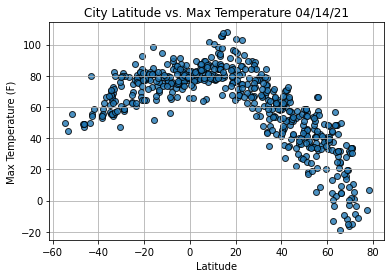

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

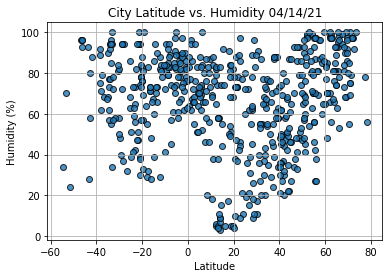

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

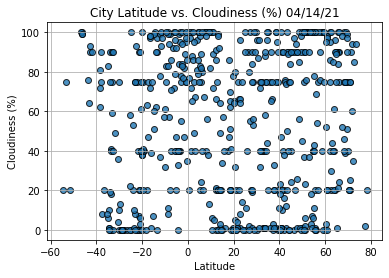

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

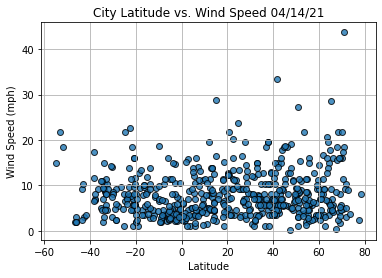

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2021-04-14 17:05:14
Lat                      -23.1203
Lng                      -134.969
Max Temp                    77.54
Humidity                       73
Cloudiness                      8
Wind Speed                   7.76
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
558    False
559     True
560     True
561     True
562     True
Name: Lat, Length: 563, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Pacific Grove,US,2021-04-14 17:05:12,36.6177,-121.9166,54.00,70,66,1.01
5,Hilo,US,2021-04-14 17:01:05,19.7297,-155.0900,64.40,68,1,4.61
14,Choya,RU,2021-04-14 17:05:14,52.0108,86.5467,36.00,98,100,3.67
15,Kapaa,US,2021-04-14 17:04:25,22.0752,-159.3190,69.80,78,75,9.22
16,Mana,GF,2021-04-14 17:05:15,5.6592,-53.7767,84.06,69,81,10.49


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

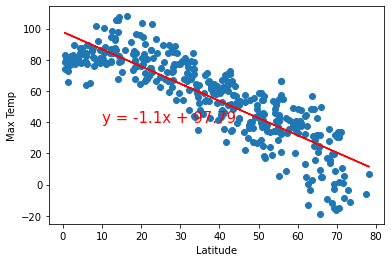

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

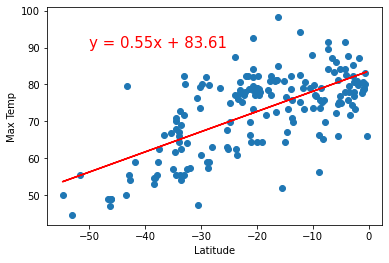

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

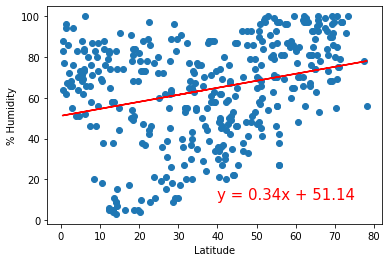

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

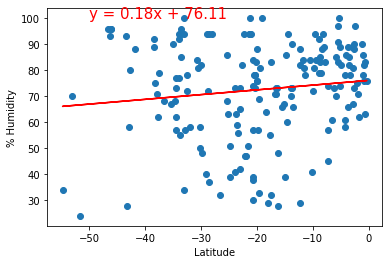

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,100))

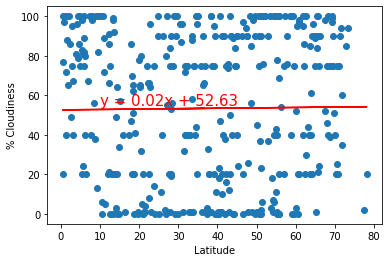

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

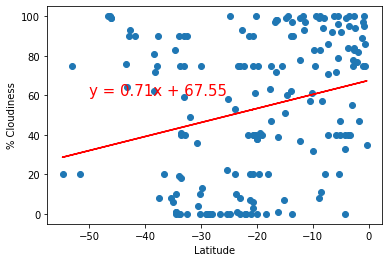

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

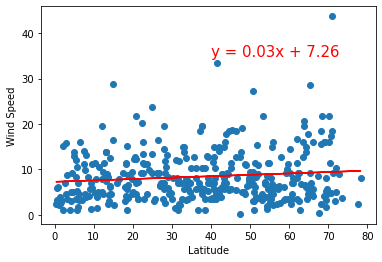

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

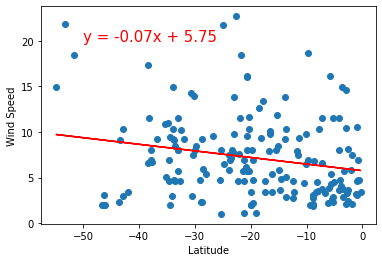

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))